In [232]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [233]:
import tensorflow as tf
from tensorflow import keras 

In [234]:
from tensorflow.keras.preprocessing.image import load_img

In [235]:
input_folder = '/kaggle/input'
output_folder = '/kaggle/working'

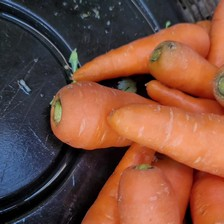

In [236]:
img = load_img(input_folder + '/vegetable-image-dataset/Vegetable Images/train/Carrot/0001.jpg', target_size=(224, 224))
img

In [237]:
x = np.array(img)

In [238]:
x.shape

(224, 224, 3)

# Preprocess data

In [239]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.efficientnet import decode_predictions

In [240]:
model = EfficientNetB0(weights='imagenet', input_shape=(224, 224, 3))

In [241]:
X = np.array([x])
X = preprocess_input(X)

In [242]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [243]:
decode_predictions(pred)

[[('n01630670', 'common_newt', 0.20701866),
  ('n03920288', 'Petri_dish', 0.12812781),
  ('n01644900', 'tailed_frog', 0.042008925),
  ('n01632777', 'axolotl', 0.029937638),
  ('n04049303', 'rain_barrel', 0.020682821)]]

# EDA

In [244]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [245]:
main_directory = input_folder + '/vegetable-image-dataset/Vegetable Images'

# Create train, validation, and test directories within main_directory
train_dir = os.path.join(main_directory, 'train')
validation_dir = os.path.join(main_directory, 'validation')
test_dir = os.path.join(main_directory, 'test')

# Transfer learning with EfficientNetB0

In [246]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

In [247]:
train_data = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),  # EfficientNetB0 input size
    batch_size=32,
    shuffle=True,
    seed=42
)

validation_data = image_dataset_from_directory(
    validation_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),  # EfficientNetB0 input size
    batch_size=32,
    shuffle=False
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [248]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

In [249]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(15, activation='softmax')  # Adjust 15 for your number of classes
])

In [250]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [251]:
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=10)  # You can adjust the number of epochs

Epoch 1/10


2023-12-17 19:44:47.561001: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_23/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 44s 80ms/step - loss: 0.0758 - accuracy: 0.9814 - val_loss: 0.0069 - val_accuracy: 0.9990
Epoch 2/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0215 - val_accuracy: 0.9940
Epoch 4/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.0037 - val_accuracy: 0.9990
Epoch 5/10
469/469 [==============================] - 36s 78ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9983
Epoch 6/10
469/469 [==============================] - 37s 78ms/step - loss: 7.3692e-04 - accuracy: 0.9999 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 7/10
469/469 [==============================] - 36s 78ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0012 - val_accuracy: 0.9993

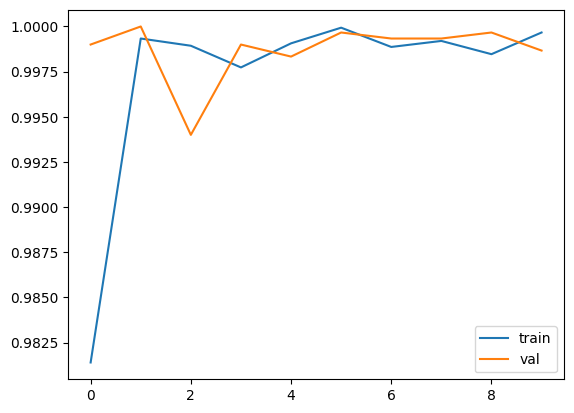

In [252]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

# Learning rate adjusting

In [253]:
def trainModel(learning_rate):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    
    model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(15, activation='softmax')  # Adjust 15 for your number of classes
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model
    

In [254]:
lr_scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = trainModel(lr)
    history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=10)
    lr_scores[lr] = history.history
    print()
    print()

0.0001
Epoch 1/10


2023-12-17 19:51:05.460986: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_24/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 45s 81ms/step - loss: 0.4765 - accuracy: 0.9282 - val_loss: 0.0595 - val_accuracy: 0.9943
Epoch 2/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0453 - accuracy: 0.9953 - val_loss: 0.0234 - val_accuracy: 0.9970
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0217 - accuracy: 0.9980 - val_loss: 0.0132 - val_accuracy: 0.9987
Epoch 4/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0134 - accuracy: 0.9986 - val_loss: 0.0089 - val_accuracy: 0.9987
Epoch 5/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0087 - accuracy: 0.9990 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 6/10
469/469 [==============================] - 36s 78ms/step - loss: 0.0061 - accuracy: 0.9993 - val_loss: 0.0054 - val_accuracy: 0.9990
Epoch 7/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0046 - accuracy: 0.9998 - val_loss: 0.0042 - val_accuracy: 0.9990
Epo

2023-12-17 19:57:21.473044: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_25/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 45s 81ms/step - loss: 0.0716 - accuracy: 0.9841 - val_loss: 0.0045 - val_accuracy: 0.9990
Epoch 2/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0032 - val_accuracy: 0.9990
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9983
Epoch 4/10
469/469 [==============================] - 36s 78ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0021 - val_accuracy: 0.9993
Epoch 5/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 6/10
469/469 [==============================] - 36s 78ms/step - loss: 6.8188e-04 - accuracy: 0.9999 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 7/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 0.9993

2023-12-17 20:03:37.368733: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_26/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 45s 81ms/step - loss: 0.1136 - accuracy: 0.9734 - val_loss: 0.1336 - val_accuracy: 0.9870
Epoch 2/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0741 - accuracy: 0.9902 - val_loss: 0.0225 - val_accuracy: 0.9967
Epoch 3/10
469/469 [==============================] - 36s 78ms/step - loss: 0.0888 - accuracy: 0.9921 - val_loss: 0.1907 - val_accuracy: 0.9877
Epoch 4/10
469/469 [==============================] - 37s 78ms/step - loss: 0.1056 - accuracy: 0.9933 - val_loss: 0.0317 - val_accuracy: 0.9973
Epoch 5/10
469/469 [==============================] - 36s 78ms/step - loss: 0.0530 - accuracy: 0.9960 - val_loss: 0.0208 - val_accuracy: 0.9990
Epoch 6/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0360 - accuracy: 0.9976 - val_loss: 0.0138 - val_accuracy: 0.9987
Epoch 7/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0545 - accuracy: 0.9965 - val_loss: 0.0253 - val_accuracy: 0.9977
Epo

2023-12-17 20:09:55.823279: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_27/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 46s 81ms/step - loss: 2.8599 - accuracy: 0.9403 - val_loss: 1.9230 - val_accuracy: 0.9697
Epoch 2/10
469/469 [==============================] - 36s 77ms/step - loss: 1.6417 - accuracy: 0.9698 - val_loss: 0.1751 - val_accuracy: 0.9897
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 1.5506 - accuracy: 0.9771 - val_loss: 1.6874 - val_accuracy: 0.9697
Epoch 4/10
469/469 [==============================] - 36s 77ms/step - loss: 1.5571 - accuracy: 0.9713 - val_loss: 0.3881 - val_accuracy: 0.9717
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.4385 - accuracy: 0.9699 - val_loss: 0.7554 - val_accuracy: 0.9710
Epoch 6/10
469/469 [==============================] - 36s 77ms/step - loss: 2.0918 - accuracy: 0.9661 - val_loss: 0.8788 - val_accuracy: 0.9683
Epoch 7/10
469/469 [==============================] - 36s 77ms/step - loss: 1.0102 - accuracy: 0.9669 - val_loss: 0.0940 - val_accuracy: 0.9740
Epo

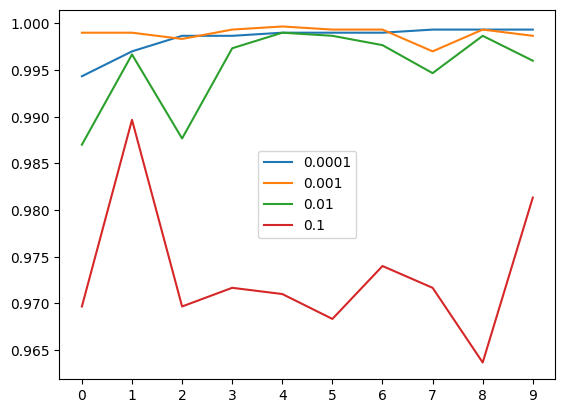

In [255]:
for lr, hist in lr_scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
    plt.xticks(np.arange(10))
    plt.legend()

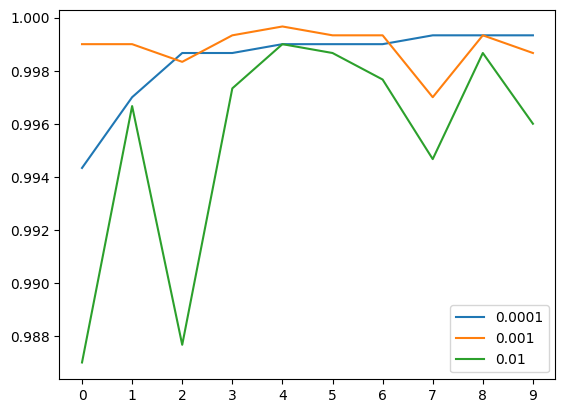

In [256]:
del lr_scores[0.1]
for lr, hist in lr_scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
    plt.xticks(np.arange(10))
    plt.legend()

There is no many differences between 0.0001, 0.001 and 0.01. 0.01 is a bit worse, so I will choose avg between accuracy and speed from these values - **0.001**.

# Customize dense layer

In [257]:
def trainDense(denseSize):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    
    model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(denseSize, activation='relu'),
    layers.Dense(15, activation='softmax')  # Adjust 15 for your number of classes
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model
    

In [258]:
dense_scores = {}

for ds in [128, 256, 512, 1024]:
    print(ds)
    
    model = trainDense(ds)
    history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=10)
    dense_scores[ds] = history.history
    print()
    print()

128
Epoch 1/10


2023-12-17 20:16:11.253560: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_28/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 45s 81ms/step - loss: 0.0950 - accuracy: 0.9806 - val_loss: 0.0069 - val_accuracy: 0.9993
Epoch 2/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 3/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 4/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0063 - val_accuracy: 0.9980
Epoch 5/10
469/469 [==============================] - 36s 78ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 6/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 7/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0015 - val_accuracy: 0.9997
Epo

2023-12-17 20:22:28.001836: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_29/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 44s 80ms/step - loss: 0.0706 - accuracy: 0.9849 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 2/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 4/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0057 - val_accuracy: 0.9993
Epoch 6/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.0045 - val_accuracy: 0.9980
Epoch 7/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.0026 - val_accuracy: 0.9997
Epo

2023-12-17 20:28:42.309325: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_30/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 45s 80ms/step - loss: 0.0551 - accuracy: 0.9872 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 2/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0100 - val_accuracy: 0.9960
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0028 - val_accuracy: 0.9993
Epoch 4/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0106 - val_accuracy: 0.9970
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 6/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0085 - val_accuracy: 0.9973
Epoch 7/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0092 - val_accuracy: 0.9980
Epo

2023-12-17 20:34:58.038839: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_31/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 47s 81ms/step - loss: 0.0529 - accuracy: 0.9863 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 2/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0027 - val_accuracy: 0.9997
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0071 - accuracy: 0.9975 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 4/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0055 - accuracy: 0.9979 - val_loss: 0.0035 - val_accuracy: 0.9987
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0158 - accuracy: 0.9965 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 6/10
469/469 [==============================] - 36s 78ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0107 - val_accuracy: 0.9963
Epoch 7/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 1.5033e-04 - val_accuracy: 1.0000

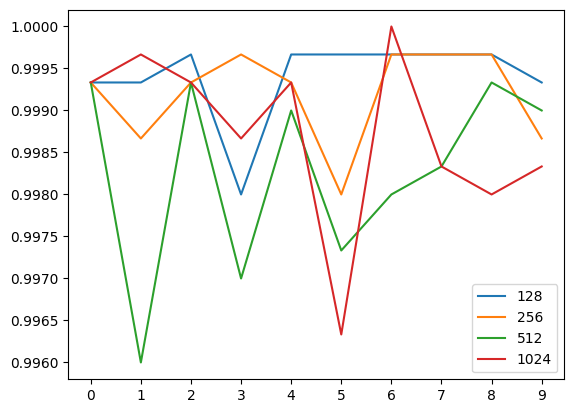

In [259]:
for ds, hist in dense_scores.items():
    plt.plot(hist['val_accuracy'], label=ds)
    plt.xticks(np.arange(10))
    plt.legend()

Overall, **128** has the best result

# Regularization and dropout

In [260]:
def trainDropout(dropout_rate):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    
    model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(15, activation='softmax')  # Adjust 15 for your number of classes
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model
    

In [261]:
dp_scores = {}

for dp in [0.0, 0.2, 0.5, 0.8]:
    print(dp)
    
    model = trainDropout(dp)
    history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=10)
    dp_scores[dp] = history.history
    print()
    print()

0.0
Epoch 1/10


2023-12-17 20:41:14.107336: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_32/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 45s 82ms/step - loss: 0.0929 - accuracy: 0.9808 - val_loss: 0.0068 - val_accuracy: 0.9990
Epoch 2/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 3/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 4/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 5/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 6/10
469/469 [==============================] - 37s 78ms/step - loss: 8.3146e-04 - accuracy: 0.9997 - val_loss: 9.4796e-04 - val_accuracy: 0.9997
Epoch 7/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0079 - val_accuracy: 0.

2023-12-17 20:47:31.670240: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_33/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 45s 81ms/step - loss: 0.1117 - accuracy: 0.9762 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 2/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 4/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 6/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 7/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0016 - val_accuracy: 0.9993
Epo

2023-12-17 20:53:51.500303: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_34/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 45s 81ms/step - loss: 0.1779 - accuracy: 0.9557 - val_loss: 0.0083 - val_accuracy: 0.9977
Epoch 2/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0226 - accuracy: 0.9944 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 3/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0116 - accuracy: 0.9976 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 4/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.0018 - val_accuracy: 0.9993
Epoch 5/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0032 - val_accuracy: 0.9987
Epoch 6/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0020 - val_accuracy: 0.9993
Epoch 7/10
469/469 [==============================] - 36s 78ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0016 - val_accuracy: 0.9993
Epo

2023-12-17 21:00:09.732516: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_35/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 47s 81ms/step - loss: 0.4861 - accuracy: 0.8579 - val_loss: 0.0192 - val_accuracy: 0.9960
Epoch 2/10
469/469 [==============================] - 37s 78ms/step - loss: 0.1341 - accuracy: 0.9603 - val_loss: 0.0078 - val_accuracy: 0.9983
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0917 - accuracy: 0.9719 - val_loss: 0.0052 - val_accuracy: 0.9980
Epoch 4/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0731 - accuracy: 0.9766 - val_loss: 0.0045 - val_accuracy: 0.9990
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0649 - accuracy: 0.9793 - val_loss: 0.0034 - val_accuracy: 0.9983
Epoch 6/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0578 - accuracy: 0.9807 - val_loss: 0.0029 - val_accuracy: 0.9987
Epoch 7/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0537 - accuracy: 0.9816 - val_loss: 0.0035 - val_accuracy: 0.9990
Epo

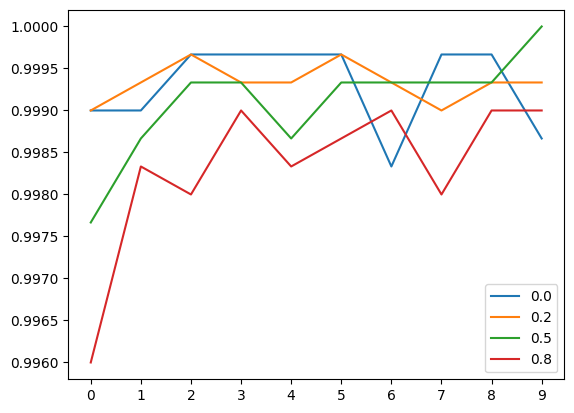

In [262]:
for dp, hist in dp_scores.items():
    plt.plot(hist['val_accuracy'], label=dp)
    plt.xticks(np.arange(10))
    plt.legend()

Overall, **0.5** looks better

# Final model

In [263]:
def finalModel(learning_rate, dropout_rate, dense_rate):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    
    model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(dense_rate, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(15, activation='softmax')  # Adjust 15 for your number of classes
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [264]:
checkpoint = keras.callbacks.ModelCheckpoint(
             'efficinentB0_best.h5',
             save_best_only=True,
             monitor='val_accuracy',
             mode='max')

In [265]:
learning_rate = 0.001
dropout_rate = 0.5
dense_rate = 128

model = finalModel(learning_rate, dropout_rate, dense_rate)
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=10,
                    callbacks=[checkpoint])

Epoch 1/10


2023-12-17 21:06:25.606662: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_36/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 45s 82ms/step - loss: 0.1731 - accuracy: 0.9572 - val_loss: 0.0075 - val_accuracy: 0.9980
Epoch 2/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0216 - accuracy: 0.9942 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0116 - accuracy: 0.9971 - val_loss: 0.0043 - val_accuracy: 0.9983
Epoch 4/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0077 - accuracy: 0.9981 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0050 - val_accuracy: 0.9983
Epoch 6/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 0.0014 - val_accuracy: 0.9993
Epoch 7/10
469/469 [==============================] - 36s 78ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0020 - val_accuracy: 0.9990
Epo

# Using the model

In [266]:
test_data = image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),  # EfficientNetB0 input size
    batch_size=32,
    shuffle=False
)

Found 3000 files belonging to 15 classes.


In [267]:
model = keras.models.load_model(output_folder + '/efficinentB0_best.h5')

In [268]:
model.evaluate(test_data)

94/94 [==============================] - 8s 63ms/step - loss: 0.0019 - accuracy: 0.9993


[0.0019138811621814966, 0.9993333220481873]

In [269]:
papaya_path = input_folder + '/vegetable-image-dataset/Vegetable Images/test/Papaya/1198.jpg'
papaya = load_img(papaya_path, target_size = (224, 224))
x = np.array(papaya)
X = np.array([x])

In [270]:
X = preprocess_input(X)

In [271]:
pred = model.predict(X)
pred

1/1 [==============================] - 1s 1s/step


array([[6.07327860e-12, 1.15899068e-08, 5.64489344e-09, 1.41161934e-07,
        5.15920107e-09, 1.04688196e-10, 1.16896388e-07, 1.54546076e-09,
        5.40674483e-09, 5.63790024e-07, 9.99999166e-01, 9.26324961e-10,
        2.64675171e-10, 1.54500024e-10, 5.47751746e-08]], dtype=float32)

In [272]:
class_labels = test_data.class_names
print("Class Labels:", class_labels)

Class Labels: ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [273]:
preds = dict(zip(class_labels, pred[0]))

In [274]:
max_value = max(preds[label] for label in class_labels)
max_label = [label for label in class_labels if preds[label] == max_value]

print(f"The maximum value among the class labels is: {max_value}")
print(f"The label(s) associated with the maximum value is/are: {max_label}")

The maximum value among the class labels is: 0.9999991655349731
The label(s) associated with the maximum value is/are: ['Papaya']
